# Bayesian networks

Exercise done by Cédric Prieels for the Machine Learning II class.
March 2020.

## Introduction

The daily occurrence of several meteorological parameters observed in the Parayas’ airport during 10 years approximately (sample size 3286) will be used for this task. In particular, the occurrence of lluvia (precipitation), nieve (snow), granizo (hail), tormenta (storm), niebla (fog), rocío (dew), escarcha (frost), nieve en el suelo (snow on the ground), neblina (haze) and viento (maximum wind gust above 50 km/h), all of them included in the text file meteoro.txt, will be considered. Note that all the variables have been discretized reflecting the occurrence/absence (binary) of the corresponding parameter.

Let's first of all download this meteoro.txt fil from Moodle, send it to the datasciencebhub and load it here in a data frame.

In [67]:
df <- read.table('meteoro.txt', header = TRUE, sep = "\t")
head(df) #Display the first lines just loaded

,lluvia,nieve,granizo,tormenta,niebla,rocio,escarcha,nieveSuelo,neblina,viento
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,s,n,n,n,n,n,n,n,n,s
2,s,n,n,n,n,n,n,n,n,s
3,s,n,n,s,n,n,n,n,n,s
4,s,n,n,n,n,n,n,n,n,s
5,s,n,s,s,n,n,n,n,n,s
6,s,n,s,s,n,n,n,n,n,s


## Exercise 1

Taking into account the graph given in the instructions obtain the factorization of the joint probability distribution and write it in the same format used by the function modelstring included in the R-package bnlearn

In [68]:
myModelstring <- "[viento][lluvia|viento][rocio|viento][niebla|viento:rocio][neblina|niebla][escarcha|rocio][tormenta|lluvia][granizo|tormenta][nieve|tormenta][nieveSuelo|nieve]"

Then, define the DAG in R using the model defined in the previous point.


  Random/Generated Bayesian network

  model:
   [viento][lluvia|viento][rocio|viento][escarcha|rocio][niebla|rocio:viento]
   [tormenta|lluvia][granizo|tormenta][neblina|niebla][nieve|tormenta]
   [nieveSuelo|nieve]
  nodes:                                 10 
  arcs:                                  10 
    undirected arcs:                     0 
    directed arcs:                       10 
  average markov blanket size:           2.00 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 



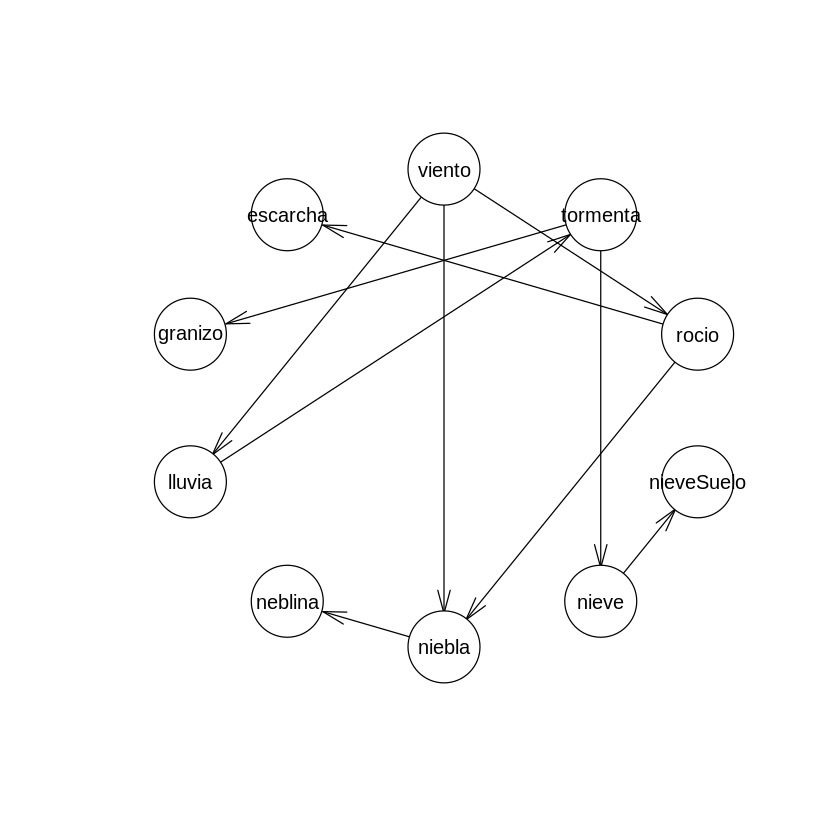

In [88]:
library(bnlearn)

dag <- model2network(myModelstring)
plot(dag)
print(dag)

For each node, show the parents and childrens.

In [70]:
for (node in nodes(dag)) {
    cat(paste("\n\nNow considering the node... ", node))
    cat(paste("\n   Parents: ", parents(dag, node = node)))
    cat(paste("\n   Children: ", children(dag, node = node)))
}



Now considering the node...  escarcha
   Parents:  rocio
   Children:  

Now considering the node...  granizo
   Parents:  tormenta
   Children:  

Now considering the node...  lluvia
   Parents:  viento
   Children:  tormenta

Now considering the node...  neblina
   Parents:  niebla
   Children:  

Now considering the node...  niebla
   Parents:  rocio 
   Parents:  viento
   Children:  neblina

Now considering the node...  nieve
   Parents:  tormenta
   Children:  nieveSuelo

Now considering the node...  nieveSuelo
   Parents:  nieve
   Children:  

Now considering the node...  rocio
   Parents:  viento
   Children:  escarcha 
   Children:  niebla

Now considering the node...  tormenta
   Parents:  lluvia
   Children:  granizo 
   Children:  nieve

Now considering the node...  viento
   Parents:  
   Children:  lluvia 
   Children:  niebla 
   Children:  rocio

Built a list with the types of structures of the graph and clasify them as serial, diverging or converging structure. TODO.

Is there any v-structure in the graph? TOCHECK.

In [80]:
vstructs(dag)

X,Z,Y


Introduce a link from haze to frost and other from hail to precipitation. For each case, what happens? Have you obtained a well-defined Bayesian Network? If not, why?

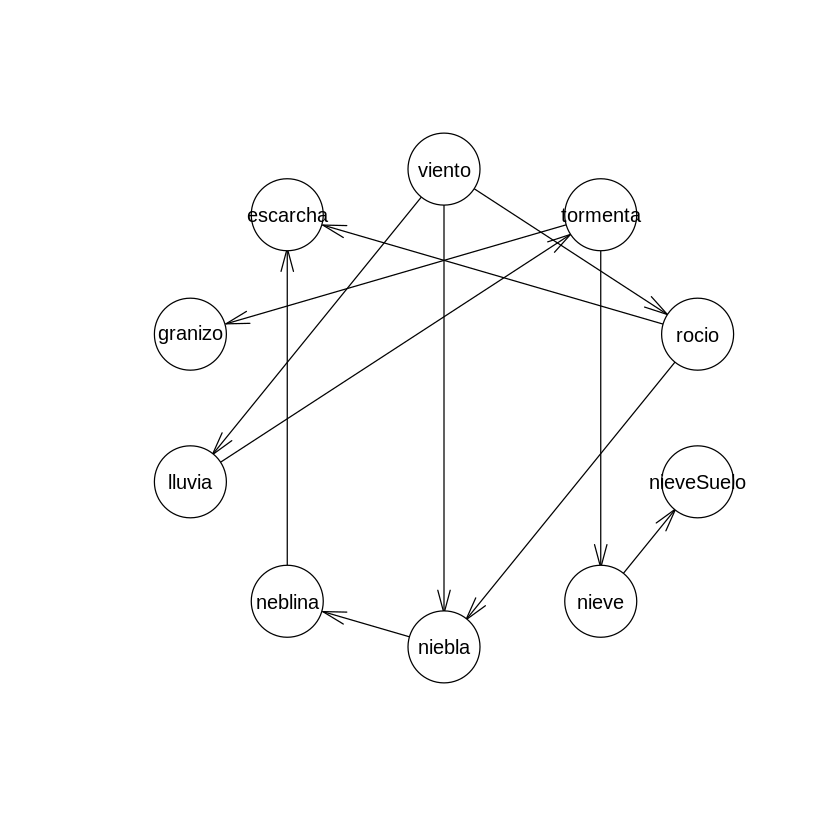

In [87]:
newdag <- set.arc(dag, from="neblina", to="escarcha")
plot(newdag) #This works, no particular issue

In [91]:
newdag <- set.arc(dag, from="granizo", to="lluvia")
plot(newdag) #This does not work to avoid the apparition of a cycle in the graph (with the tormenta node)

ERROR: Error in arc.operations(x = x, from = from, to = to, op = "set", check.cycles = check.cycles, : the resulting graph contains cycles.


Obtain the Markov Blanquet for the node dew.

In [92]:
mb(dag, "rocio")

[1] "escarcha" "niebla"   "viento"

Introduce a link from precipitation to frog, Is there any change in the Markov Blanquet of dew? If yes, how does the Markov Blanquet change? TOCHECK.

In [95]:
newdag <- set.arc(dag, from="lluvia", to="niebla")
mb(dag, "rocio") #The markov blanquet does not appear to change

[1] "escarcha" "niebla"   "viento"

## Exercise 2

Considering the data of the text file meteoro.txt and the previously defined DAG, build the Bayesian Network usint the Bayesian method of parametric learning.

In [96]:
bn <- bn.fit(dag, data=df)

Without using the factorization given by the DAG or the Bayesian Network learnt, what is the potential number of parameters of the joint probability function? TOCHECK.

In [100]:
#If we don't use any of these factorization methods, we would expect to have 2^nodes - 1 (Yes/no, 10 nodes = 1023) parameters

Given the Bayesian Network, how much parameters the joint probability function has?

In [98]:
nparams(bn) #Number of parameters greatly reduced!

[1] 21

Obtain the number of parameters for each of the local distribution corresponding to each node. TODO.

In [106]:
?nparams

Obtain and show in graphics the tables of conditional probability of the nodes hail and frog.

In [107]:
bn$granizo


  Parameters of node granizo (multinomial distribution)

Conditional probability table:
 
       tormenta
granizo           n           s
      n 0.990262902 0.746341463
      s 0.009737098 0.253658537

In [108]:
bn$niebla


  Parameters of node niebla (multinomial distribution)

Conditional probability table:
 
, , viento = n

      rocio
niebla           n           s
     n 0.946455131 0.855345912
     s 0.053544869 0.144654088

, , viento = s

      rocio
niebla           n           s
     n 0.995475113 0.937500000
     s 0.004524887 0.062500000


## Exercise 3

Once the Bayesian Network has been built we can obtain the probability of any variable or subset of variables given any evidence. In other words, we can make inference based on the network. TOCHECK.

Remember the concept of d-separación and take into account the DAG defined to reasonably and if the following questions are or not true:

- **Snow and hail are independent a priori.** 

The path linking them is Nieve-Tormenta-Granizo, and there is no v-structures in the path. In this case, both are independant if any of the d-separation set (the observations given, here, an empty set) is in the separation path, so in this case, we cannot conclude that they are independant. FALSE.

- **Snow and hail are independent given the storm.**

The path linking them is Nieve-Tormenta-Granizo, and there is no v-structures in the path. In this case, both are independant if any of the d-separation set (here, Tormenta) is in the separation path, so in this case, we can conclude that snow and hail are independant given the storm. TRUE.

- **Snow on the ground and haze are independent.**

In this case, we have two paths to consider: path not passing through rocio and the one passing through rocio. Neither path has a v-structure so the justification and the answer is exactly the same as before: if the observation is in any path, they we can conclude they are independant. This is not the case here. FALSE.

- **Snow on the ground and haze are independent given the storm.**

In this case, we have two paths to consider: path not passing through rocio and the one passing through rocio. Neither path has a v-structure so the justification and the answer is exactly the same as before: if the observation is in any path, they we can conclude they are independant. This is the case here since tormenta is in both paths. TRUE.

Let's check these answers with some code.

In [111]:
dsep(dag, x = "nieve", y = "granizo")
dsep(dag, x = "nieve", y = "granizo", z="tormenta")
dsep(dag, x = "nieveSuelo", y = "neblina")
dsep(dag, x = "nieveSuelo", y = "neblina", z="tormenta")

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

NOTE: Using the exact inference, obtain the probability of the following phenomenon knowing that storm has occurred:
- Precipitation occurs, P(lluvia=s|tormenta=s)
- There are wind gusts greater than 50 Km/h, P(viento=s|tormenta=s)
- Both of the previous, P(lluvia=s,viento=n|tormenta=s)
- Based on the previous results and knowing the storm has occurred a particular day:
    - Is the probability of rain/precipitation greater when storm occurs than any other day?
    - How does the storm affect to the probability of occurence of wind gusts greater than 50 km/h? It increases or decreses? How much?

In [113]:
if(!require(gRain)) install.packages("gRain")
library(gRain)

Loading required package: gRain

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gRain’”
Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gRain’ is not available (for R version 3.4.4)”


ERROR: Error in library(gRain): there is no package called ‘gRain’


Repeat the previous point but using inexact inference. For each probability obtain 100 estimations/realizations and draw a boxplot reflecting the spread of the probability estimation. Include also the exact value obtained in the previous point.